# Assignment 39
## Vector Product Identities

### Verification of an Identity Relating the Levi-Civita Symbol and the Kronecker Delta using the Einstein summation Convention

The identity is given by 
$$\epsilon_{ijk}\epsilon_{klm} = \delta_{il}\delta_{jm} - \delta_{im}\delta_{jl},$$ 

where all latin alphabet indices are understood to run over $\{1, 2, 3\}$, and the summation over $k$ is implied by the repeated indices in the same term on the LHS in accordance with the Einstein Summation Convention. It's important to note that only repeated indices *in the same term* imply summation; in particular, since all indices except for $k$ are free on the LHS, they are *also* free on the RHS. There is thus no summation on the RHS. 

In [1]:
import pandas as pd
from sympy import *
from sympy import init_session

init_session()


def einstein_summation_convention(i: int, j: int, l: int, m: int) -> int:
    lhs = (
        (LeviCivita(i, j, 1) * LeviCivita(1, l, m))
        + (LeviCivita(i, j, 2) * LeviCivita(2, l, m))
        + (LeviCivita(i, j, 3) * LeviCivita(3, l, m))
    )
    rhs = KroneckerDelta(i, l) * KroneckerDelta(j, m) - KroneckerDelta(
        i, m
    ) * KroneckerDelta(j, l)
    return simplify(lhs - rhs)


def generate_tuples():
    tpls = []
    for i in range(1, 4):
        for j in range(1, 4):
            for k in range(1, 4):
                for l in range(1, 4):
                    for m in range(1, 4):
                        tpls.append((i, j, k, l, m))
    return tpls


tuples = generate_tuples()
result = [einstein_summation_convention(t[0], t[1], t[3], t[4]) for t in tuples]

print(all([r == 0 for r in result]))

pd.set_option("display.max_rows", 243)
df = pd.DataFrame(
    data=list(zip(tuples, result)),
    columns=[
        "$(i,j,k,l,m)$",
        "$\epsilon_{ijk}\epsilon_{klm} = \delta_{il}\delta_{jm} - \delta_{im}\delta_{jl}$",
    ],
)
df.style.hide(axis="index").set_properties(**{"text-align": "left"})

IPython console for SymPy 1.11.1 (Python 3.10.7-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.11.1/

True


"$(i,j,k,l,m)$",$\epsilon_{ijk}\epsilon_{klm} = \delta_{il}\delta_{jm} - \delta_{im}\delta_{jl}$
"(1, 1, 1, 1, 1)",0
"(1, 1, 1, 1, 2)",0
"(1, 1, 1, 1, 3)",0
"(1, 1, 1, 2, 1)",0
"(1, 1, 1, 2, 2)",0
"(1, 1, 1, 2, 3)",0
"(1, 1, 1, 3, 1)",0
"(1, 1, 1, 3, 2)",0
"(1, 1, 1, 3, 3)",0
"(1, 1, 2, 1, 1)",0


## Verification of an identity involving cyclic perumations of vector mutliplications with Sympy

In [2]:
dot = lambda V1, V2: V1[0] * V2[0] + V1[1] * V2[1] + V1[2] * V2[2]

In [3]:
a = symbols("a:3")
b = symbols("b:3")
c = symbols("c:3")
A = Matrix(a)
B = Matrix(b)
C = Matrix(c)
dot(A, B)

In [4]:
cross = lambda V1, V2: Matrix(
    [
        [V1[1] * V2[2] - V1[2] * V2[1]],
        [V1[2] * V2[0] - V1[0] * V2[2]],
        [V1[0] * V2[1] - V1[1] * V2[0]],
    ]
)

In [5]:
abc = dot(A, cross(B, C))
abc

In [6]:
bca = dot(B, cross(C, A))
bca

In [7]:
cab = dot(C, cross(A, B))
cab

In [8]:
simplify(abc - bca)

In [9]:
simplify(abc - cab)

In [10]:
simplify(bca - cab)

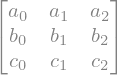

In [11]:
m = Matrix([A.T, B.T, C.T])
m

In [12]:
dtrmnt = m.det()
simplify(dtrmnt)

In [13]:
simplify(dtrmnt - abc)

In [14]:
simplify(dtrmnt - bca)

In [15]:
simplify(dtrmnt - cab)

# Assignment 40

## The gradient of a rotationally symmetric function

In [16]:
from sympy.vector import CoordSys3D

N = CoordSys3D("N")
# define grad
x, y, z = symbols("x,y,z", real=True)
grad = (
    lambda phi: Derivative(phi, x) * N.i
    + Derivative(phi, y) * N.j
    + Derivative(phi, z) * N.k
)
r = sqrt(x**2 + y**2 + z**2)
G = Function("G")(r)

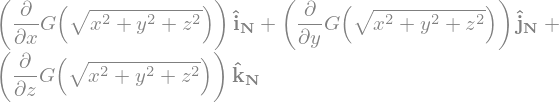

In [17]:
grad(G)

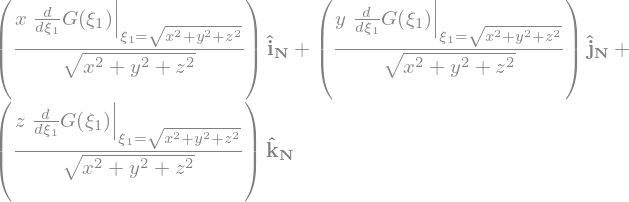

In [18]:
grad(G).doit()

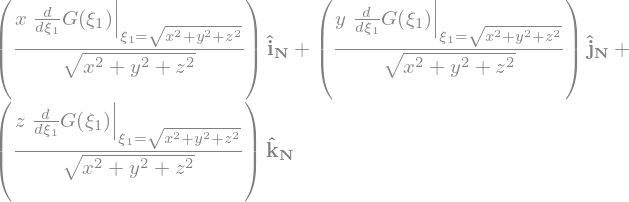

In [19]:
simplify(grad(G).doit())

Now, in the above we can factor out the common factor of $$\frac{d}{d\xi_{1}}G(\xi_{1})\Big\vert_{\xi_{1} = \sqrt{x^{2} + y^{2} + z^{2}}} = \frac{d}{dr}G(r)\Big\vert_{r = \sqrt{x^{2} + y^{2} + z^{2}}}$$

where we have used the fact that $\xi_{1} = r = \sqrt{x^{2} + y^{2} + z^{2}}$. 

Then the expression above becomes $$\Big(\frac{x\hat{\mathbf{i}} + y\hat{\mathbf{j}} + z\hat{\mathbf{k}}}{\sqrt{x^{2} + y^{2} + z^{2}}}\Big)\frac{d}{dr}G(r)$$

where the deriivative is understood to be evaluated at $r = \sqrt{x^{2} + y^{2} + z^{2}}$.

Finally, we observe that $$\mathbf{r} = x\hat{\mathbf{i}} + y\hat{\mathbf{j}} + z\hat{\mathbf{k}}$$

Thus the expression above can be written as $$\frac{\mathbf{r}}{r}\frac{dG(r)}{dr} = \mathbf{\hat{e}}_{r}\frac{dG(r)}{dr}$$

# Assignment 41

## Divergence of a radial vector field

In [20]:
from sympy.vector import divergence

div = (
    lambda V: Derivative(V.components[N.i], x)
    + Derivative(V.components[N.j], y)
    + Derivative(V.components[N.k], z)
)
x, y, z = symbols("x,y,z", real=True, positive=True)
R = x * N.i + y * N.j + z * N.k
r = sqrt(x**2 + y**2 + z**2)
f = Function("f")(r)
v = (R) * f

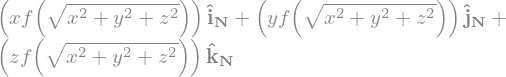

In [21]:
v

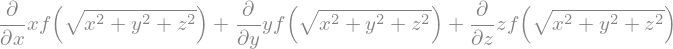

In [22]:
div(v)

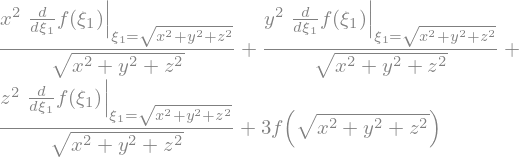

In [23]:
simplify(div(v))

In [24]:
l = factor(simplify(div(v) - 3 * f))

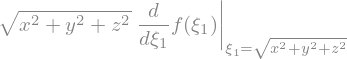

In [25]:
l

In [26]:
r = 3 * f

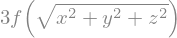

In [27]:
r

In [28]:
sol = l + r

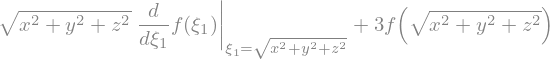

In [29]:
sol

# Assignment 42

## Identities Involving the Del Operator
### (12.57)

In [30]:
from sympy.vector import Del, Divergence

vecXdel = (
    lambda U, V: U.components[N.i] * Derivative(V.components[N.i], x) * N.i
    + U.components[N.j] * Derivative(V.components[N.j], y) * N.j
    + U.components[N.k] * Derivative(V.components[N.k], z) * N.k
)
ai, aj, ak, bi, bj, bk = symbols("a_{i},a_{j},a_{k},b_{i},b_{j},b_{k}", real=True)
A = ai * N.i + aj * N.j + ak * N.k
B = bi * N.i + bj * N.j + bk * N.k
delop = Del()

In [31]:
A

In [32]:
B

In [33]:
AXB = A.cross(B)

In [34]:
AXB

In [35]:
DelAXB = delop.cross(A.cross(B))

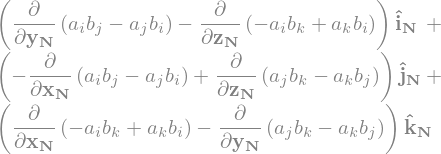

In [36]:
DelAXB

In [37]:
RHS1 = A * (Divergence(B)) - B * (Divergence(A))

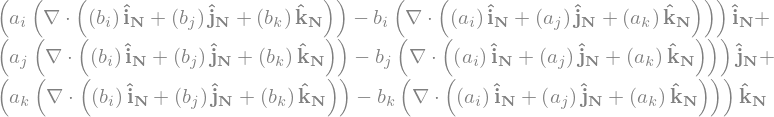

In [38]:
RHS1

In [39]:
RHS2 = vecXdel(B, A)

In [40]:
RHS3 = vecXdel(A, B)

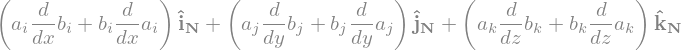

In [41]:
RHS2 + RHS3

In [42]:
RHS = RHS1 + RHS2 + RHS3

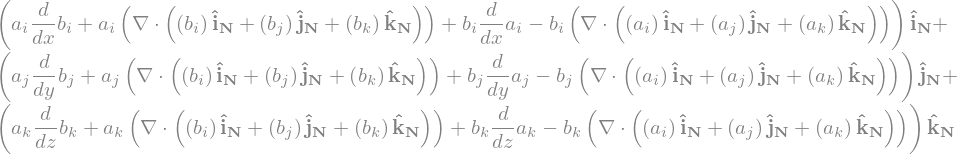

In [43]:
RHS

In [44]:
simplify(DelAXB - RHS)

### (12.58)

In [45]:
from sympy.vector import curl
AdotB = A.dot(B)

In [46]:
AdotB

In [47]:
LHS = grad(A.dot(B))

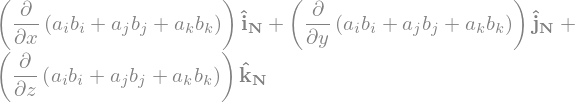

In [48]:
LHS

In [49]:
RHS = vecXdel(A, B) + vecXdel(B, A) + A.cross(curl(B)) + B.cross(curl(A))

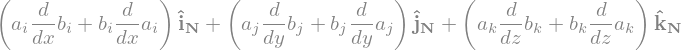

In [50]:
RHS

In [51]:
simplify(LHS - RHS)